## Import files from the Australian one-minute solar radiation data

The Product Notes (IDCJAC0022) indicate that the data is in a fixed width format, rather than delimited.  The notes provide mode detailed explanation of each variable

In [11]:
# Change path as required
import os
os.chdir("C:\\Users\\Andrew\\Desktop\\Capstone Professional Project")

In [12]:
import pandas as pd

colspec = [(1,2), (3,9), (10,14), (15,17), (18,20), (21,23), (24,26), 
           (27,34), (35,42), (43,50), (51,58), (59,66), 
           (67,74), (75,82), (83,90), (91,98), (99,106), 
           (107,114), (115,122), (123,130), (131,138), (139,146), 
           (147,154), (155,162), (163,170), (171,178), (179,186), 
           (187,194), (195,202), (203,210), (211, 218), (219,226), 
           (227,232), (233,238), (239,244), (245,252)]

headers = ['record_id', 'station_number', 'yr', 'mth', 'day', 'hr', 'mnt', 
          'mean_global', 'min_global', 'max_global', 'sd_global', 'uncert_mean_global',
          'mean_direct', 'min_direct', 'max_direct', 'sd_direct', 'uncert_mean_direct',
          'mean_diffuse', 'min_diffuse', 'max_diffuse', 'sd_diffuse', 'uncert_mean_diffuse',
          'mean_terr', 'min_terr', 'max_terr', 'sd_terr', 'uncert_mean_terr',
          'mean_dir_horiz', 'min_dir_horiz', 'max_dir_horiz', 'sd_dir_horiz', 'uncert_dir_horiz',
          'sunsh_sec_96', 'sunsh_sec_120', 'sunsh_sec_144', 'zenith_dist']

In [13]:
def load_1_sec_solar(path):
    return pd.read_fwf(path, colspecs=colspec, names=headers, index_col=False, skiprows=[0])

In [14]:
# Example file
example = load_1_sec_solar('sl_023034_2018_05.txt')

In [15]:
example.head()

,record_id,station_number,yr,mth,day,hr,mnt,mean_global,min_global,max_global,...,uncert_mean_terr,mean_dir_horiz,min_dir_horiz,max_dir_horiz,sd_dir_horiz,uncert_dir_horiz,sunsh_sec_96,sunsh_sec_120,sunsh_sec_144,zenith_dist
0,l,23034,2018,5,1,0,0,0.0,0.0,0.0,...,4.61,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
1,l,23034,2018,5,1,0,1,0.0,0.0,0.0,...,4.58,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
2,l,23034,2018,5,1,0,2,0.0,0.0,0.0,...,4.56,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
3,l,23034,2018,5,1,0,3,0.0,0.0,0.0,...,4.52,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
4,l,23034,2018,5,1,0,4,0.0,0.0,0.0,...,4.54,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0


In [16]:
# Consolidate time/date fields into one field
import datetime
import pytz

In [17]:
x = example.iloc[24]

In [18]:
# Do we need to record the time zone?

timezone = pytz.timezone('Australia/Adelaide')
y = datetime.datetime(x.yr, x.mth, x.day, x.hr, x.mnt, tzinfo=timezone).isoformat()
y

'2018-05-01T00:24:00+09:00'

In [19]:
# Assume not at this stage

def dt(yr, mth, day, hr, mnt):
    return datetime.datetime(yr, mth, day, hr, mnt).isoformat()

dt = example.apply(lambda x: dt(x['yr'], x['mth'], x['day'], x['hr'], x['mnt']), axis=1)
example.insert(loc=2, column='date_time', value=dt)
example = example.drop(['yr', 'mth', 'day', 'hr', 'mnt'], axis=1)
example.head()

,record_id,station_number,date_time,mean_global,min_global,max_global,sd_global,uncert_mean_global,mean_direct,min_direct,...,uncert_mean_terr,mean_dir_horiz,min_dir_horiz,max_dir_horiz,sd_dir_horiz,uncert_dir_horiz,sunsh_sec_96,sunsh_sec_120,sunsh_sec_144,zenith_dist
0,l,23034,2018-05-01T00:00:00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,4.61,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
1,l,23034,2018-05-01T00:01:00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,4.58,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
2,l,23034,2018-05-01T00:02:00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,4.56,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
3,l,23034,2018-05-01T00:03:00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,4.52,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0
4,l,23034,2018-05-01T00:04:00,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,4.54,0.0,0.0,0.0,0.0,NaN,0,0,0,0.0


In [39]:
# Three days' mean direct horizontal irradiance
day1 = example.iloc[0:60*24]
day2 = example.iloc[60*24+1:60*24*2]
day3 = example.iloc[60*24*2+1:60*24*3]
day4 = example.iloc[60*24*3+1:60*24*4]
day5 = example.iloc[60*24*4+1:60*24*5]
day6 = example.iloc[60*24*5+1:60*24*6]

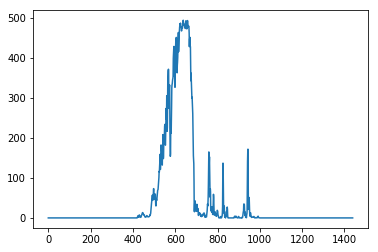

In [25]:
import matplotlib.pyplot as plt
plt.plot(day1.mean_dir_horiz);

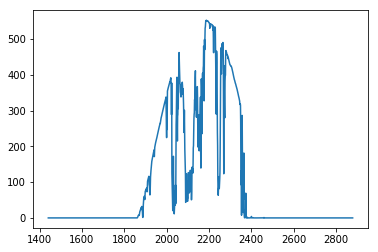

In [32]:
plt.plot(day2.mean_dir_horiz);

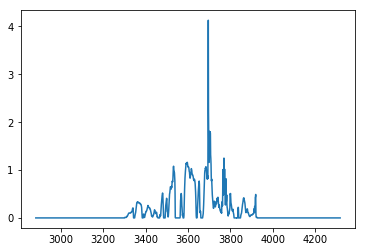

In [34]:
plt.plot(day3.mean_dir_horiz);

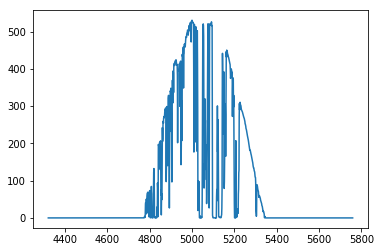

In [36]:
plt.plot(day4.mean_dir_horiz);

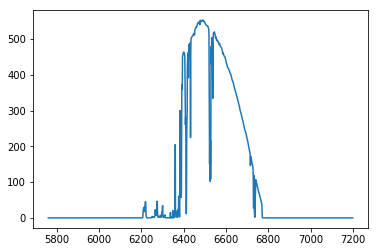

In [38]:
plt.plot(day5.mean_dir_horiz);

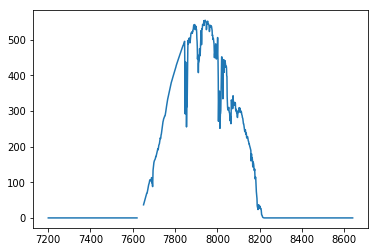

In [40]:
plt.plot(day6.mean_dir_horiz);